# 퍼셉트론 (Perceptron)
- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def activate(self, x): # perceptron 연산
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0

In [3]:
test_cases = [(0,0), (0,1), (1,0), (1,1)]

### AND 게이트

In [5]:
AND_gate = Perceptron(weights=[0.5,0.5], bias=-0.7)

for test in test_cases:
    print(f'input: {test} | output: {AND_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 0
input: (1, 0) | output: 0
input: (1, 1) | output: 1


### OR 게이트

In [6]:
OR_gate = Perceptron(weights=[0.5,0.5], bias=-0.2)

for test in test_cases:
    print(f'input: {test} | output: {OR_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 1


### NAND 게이트

In [12]:
NAND_gate = Perceptron(weights=[-0.5,-0.5], bias=0.7) # and_gate와 정반대

for test in test_cases:
    print(f'input: {test} | output: {NAND_gate.activate(test)}')

input: (0, 0) | output: 1
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 0


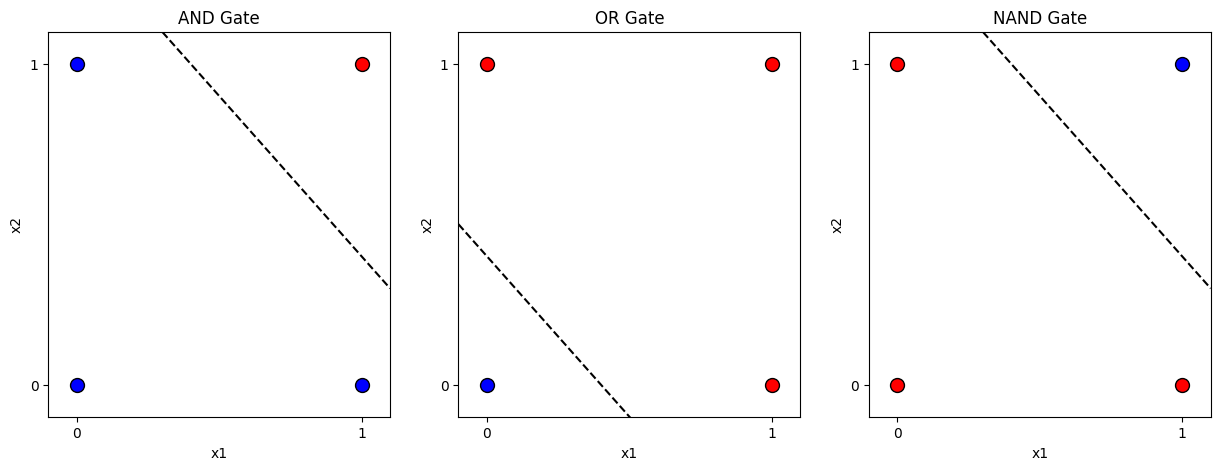

In [ ]:
# 시각화
import matplotlib.pyplot as plt

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
gates = {
    "AND": AND_gate,
    "OR": OR_gate,
    "NAND": NAND_gate
}

fig, axes = plt.subplots(1,3, figsize=(15,5))

for idx, (gate_name, perceptron) in enumerate(gates.items()):
    ax = axes[idx]
    outputs = np.array([perceptron.activate(x) for x in inputs]) # input값에 따라 나오는 것들로 배열을 구성

    # input 값을 결과에 따라 산점도로 표시
    for (x1, x2), y in zip(inputs, outputs): # output 결과를 가지고 scatter를 찍음
        ax.scatter(x1, x2, c='red' if y==1 else 'blue', s=100, edgecolor='black') #inputs에서 넘겨준 두 원소를 가지고 점의 위치를 찍어줄거기 때문에 output까지 받은거임 output값에 따라 color가 달라짐
    
    # 결정 경계 표현
    x_vals = np.linspace(-0.1, 1.1, 100) # x1 # x값을 0 or 1로 줬기 때문에 확장된 범위에서 경계 표현을 해주기 위해 -0.1부터 1.1까지 100개의 구간으로 나눠서 결정 경계를 그리기 위한 x값을 준 것임
    y_vals = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1] # x2 # w1x + w2y + w3 = 0 ---y를 두고 이항하면---> y = -w1x/w2 - w3/w2 # 선형 분리를 하기 위해 사용
    ax.plot(x_vals, y_vals, 'k--')

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.show()

### XOR 게이트